In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('./classification_results_trial_0001.csv', sep=',')


Gráfico de barras — contagem por real_class

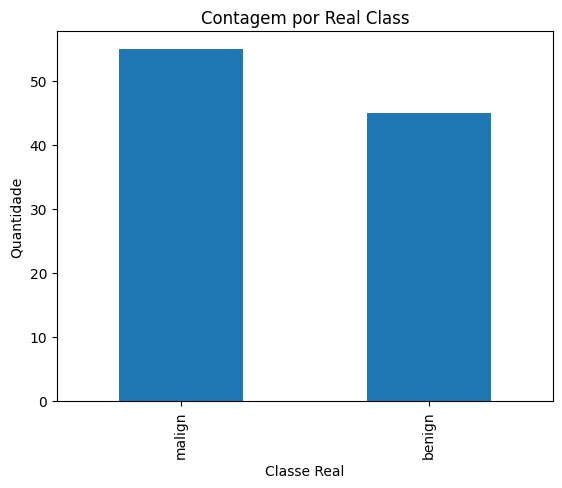

In [3]:
data["real_class"].value_counts().plot(kind="bar")
plt.title("Contagem por Real Class")
plt.xlabel("Classe Real")
plt.ylabel("Quantidade")
plt.show()

Gráfico de barras — contagem por predicted_class

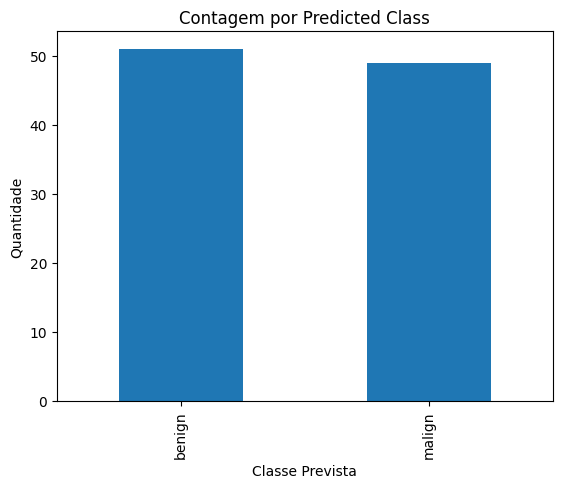

In [4]:
data["predicted_class"].value_counts().plot(kind="bar")
plt.title("Contagem por Predicted Class")
plt.xlabel("Classe Prevista")
plt.ylabel("Quantidade")
plt.show()

Histograma de prob_benign

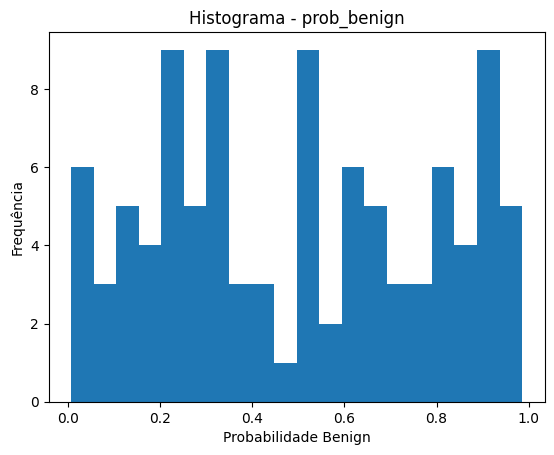

In [5]:
plt.hist(data["prob_benign"], bins=20)
plt.title("Histograma - prob_benign")
plt.xlabel("Probabilidade Benign")
plt.ylabel("Frequência")
plt.show()

Histograma de prob_malign

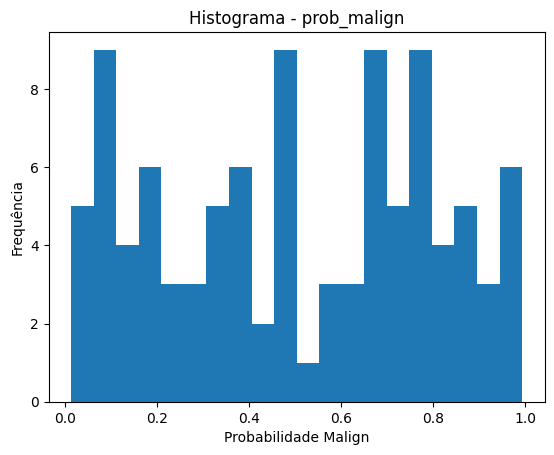

In [6]:
plt.hist(data["prob_malign"], bins=20)
plt.title("Histograma - prob_malign")
plt.xlabel("Probabilidade Malign")
plt.ylabel("Frequência")
plt.show()

Scatter plot (acerto vs erro)

In [7]:
data["erro"] = data["predicted_class"] != data["real_class"]

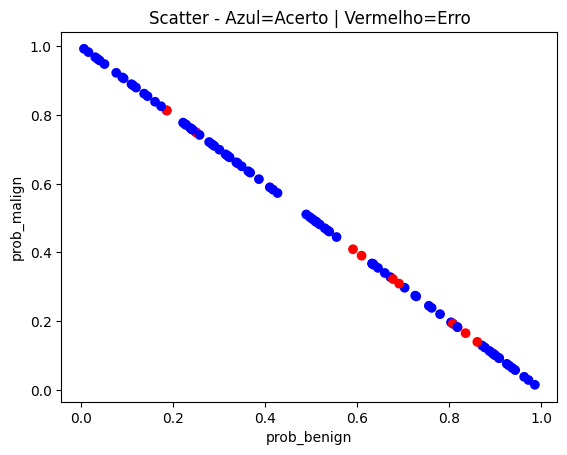

In [8]:
plt.scatter(
    data["prob_benign"],
    data["prob_malign"],
    c=data["erro"].map({True: "red", False: "blue"})
)

plt.xlabel("prob_benign")
plt.ylabel("prob_malign")
plt.title("Scatter - Azul=Acerto | Vermelho=Erro")
plt.show()

Qual erro é mais comum (FP ou FN)?

In [9]:
TP = ((data["real_class"] == "malign") & (data["predicted_class"] == "malign")).sum()
TN = ((data["real_class"] == "benign") & (data["predicted_class"] == "benign")).sum()
FP = ((data["real_class"] == "benign") & (data["predicted_class"] == "malign")).sum()
FN = ((data["real_class"] == "malign") & (data["predicted_class"] == "benign")).sum()

FP, FN

(np.int64(3), np.int64(9))

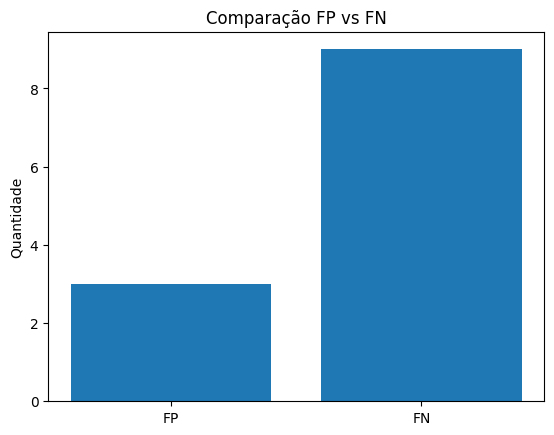

In [10]:
plt.bar(["FP", "FN"], [FP, FN])
plt.title("Comparação FP vs FN")
plt.ylabel("Quantidade")
plt.show()

FN (False Negative) é mais preocupante.

Porque:

* FP → paciente saudável pode passar por exames extras.

* FN → paciente com câncer pode não ser tratado.

Isso pode atrasar diagnóstico e reduzir chance de cura. Já que geralmente o foco é maximizr o reccl para reduzir o FN